In [1]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/dataset.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
 Population                        float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
def tratar_nomes_colunas(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    df = df.rename(columns={"thinness__1-19_years":"thinness_till19",
                            "thinness_5-9_years": "thinness_till9", 
                            "schooling": "school"})
    return df

df = tratar_nomes_colunas(df)
print(df.columns)

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_till19',
       'thinness_till9', 'income_composition_of_resources', 'school'],
      dtype='object')


In [6]:
# Cria um dicionário com a descrição de cada variável
df_dict = {
    "country": "País de origem dos dados.",
    "life_expectancy": "Expectativa de vida ao nascer, em anos.",
    "year": "Ano em que os dados foram coletados.",
    "status": "Status de desenvolvimento do país ('Developing' para países em desenvolvimento, 'Developed' para países desenvolvidos).",
    "adult_mortality": "Taxa de mortalidade de adultos entre 15 e 60 anos por 1000 habitantes.",
    "inf_death": "Número de mortes de crianças com menos de 5 anos por 1000 nascidos vivos.",
    "alcohol": "Consumo de álcool per capita (litros de álcool puro por ano).",
    "hepatitisB": "Cobertura de vacinação contra hepatite B em crianças de 1 ano (%).",
    "measles": "Número de casos de sarampo relatados por 1000 habitantes.",
    "bmi": "Índice médio de massa corporal da população adulta.",
    "polio": "Cobertura de vacinação contra poliomielite em crianças de 1 ano (%).",
    "diphtheria": "Cobertura de vacinação contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano (%).",
    "hiv": "Prevalência de HIV na população adulta (%).",
    "gdp": "Produto Interno Bruto per capita (em dólares americanos).",
    "total_expenditure": "Gasto total em saúde como porcentagem do PIB.",
    "thinness_till19": "Prevalência de magreza em crianças e adolescentes de 10 a 19 anos (%).",
    "thinness_till9": "Prevalência de magreza em crianças de 5 a 9 anos (%).",
    "school": "Número médio de anos de escolaridade.",
    "population": "População total do país."
}

## Análise Exploratória

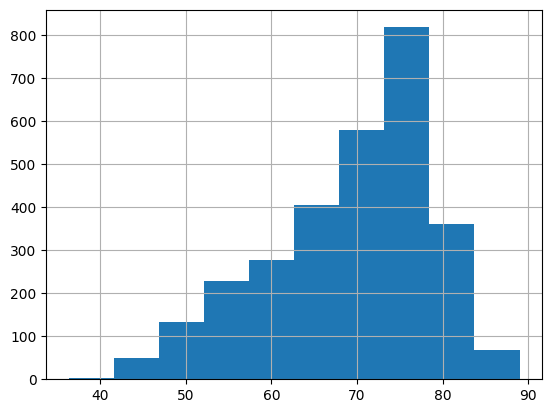

In [7]:
df['life_expectancy'].hist();

In [8]:
def dsa_get_pairs(data, alvo, atributos, n):
    # Grupos de linhas com 3 (n) gráficos por linha
    grupos_linhas = [atributos[i:i+n] for i in range(0, len(atributos), n)]
    # Loop pelos grupos de linhas para criar cada pair plot
    for linha in grupos_linhas:
        plot = sns.pairplot(x_vars = linha, y_vars = alvo, data = data, kind = "reg", height = 3)
    return

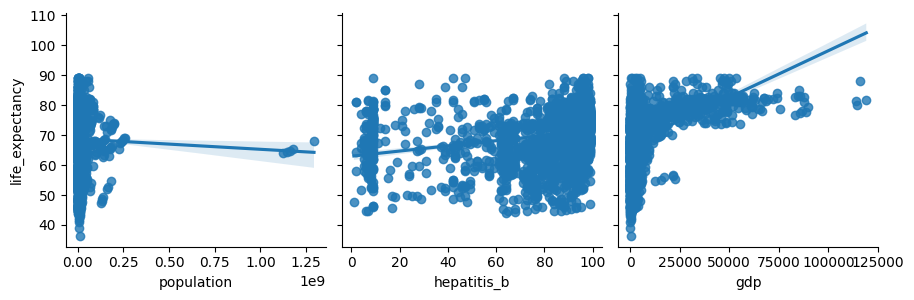

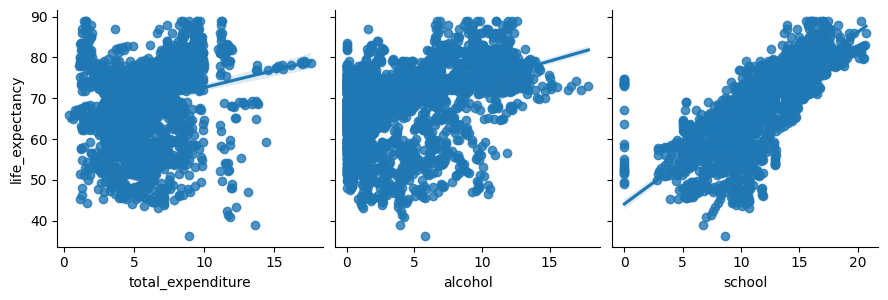

In [9]:
# Variável alvo
alvo = ['life_expectancy']

# Vamos usar alguns atributos
atributos = ['population', 'hepatitis_b', 'gdp', 'total_expenditure', 'alcohol', 'school'] 

dsa_get_pairs(df, alvo, atributos, 3)

## Detectando Valores Ausentes

In [10]:
df.isnull().sum().sort_values(ascending = False) / df.shape[0] * 100

population                         22.191967
hepatitis_b                        18.822328
gdp                                15.248468
total_expenditure                   7.692308
alcohol                             6.603131
income_composition_of_resources     5.684139
school                              5.547992
thinness_till9                      1.157250
thinness_till19                     1.157250
bmi                                 1.157250
polio                               0.646698
diphtheria                          0.646698
life_expectancy                     0.340368
adult_mortality                     0.340368
hiv/aids                            0.000000
country                             0.000000
year                                0.000000
measles                             0.000000
percentage_expenditure              0.000000
infant_deaths                       0.000000
status                              0.000000
under-five_deaths                   0.000000
dtype: flo

In [11]:
df.describe(include='all')

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_till19,thinness_till9,income_composition_of_resources,school
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


## Detectando Outliers

Vamos analisar as variáveis que têm o maior percentual de valores ausentes.

In [12]:
# atributos com mais de 5% de valores ausentes
atributos = ['population', 'hepatitis_b', 'gdp', 'total_expenditure', 'alcohol', 'school'] 
novo_dataframe = df[atributos]

In [13]:
# Identificação de outliers através do método do IQR (Interquartile Range)
Q1 = novo_dataframe.quantile(0.25)
Q3 = novo_dataframe.quantile(0.75)
IQR = Q3 - Q1

outliers = ((novo_dataframe < (Q1 - 1.5 * IQR)) | (novo_dataframe > (Q3 + 1.5 * IQR))).sum()
outliers

population           294
hepatitis_b          254
gdp                  365
total_expenditure     32
alcohol                0
school                44
dtype: int64

In [14]:
# Cria um resumo com os outliers
outliers_summary = pd.DataFrame({'outliers': outliers, 'percentual': (outliers / len(novo_dataframe)) * 100})

# Retorna os resultados quando o valor for maior do que zero
outliers_summary[outliers_summary['outliers'] > 0]

,outliers,percentual
population,294,10.006807
hepatitis_b,254,8.645337
gdp,365,12.423417
total_expenditure,32,1.089176
school,44,1.497617


## Tratamento de Outliers

Decisão: Remover os outliers.

In [15]:
# Definindo os limites para filtrar os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [16]:
novo_dataframe.head()

,population,hepatitis_b,gdp,total_expenditure,alcohol,school
0,33736494.0,65.0,584.259210,8.16,0.01,10.1
1,327582.0,62.0,612.696514,8.18,0.01,10.0
2,31731688.0,64.0,631.744976,8.13,0.01,9.9
3,3696958.0,67.0,669.959000,8.52,0.01,9.8
4,2978599.0,68.0,63.537231,7.87,0.01,9.5


In [17]:
limite_inferior

population          -1.064106e+07
hepatitis_b          4.700000e+01
gdp                 -7.706370e+03
total_expenditure   -5.887500e-01
alcohol             -9.360000e+00
school               3.800000e+00
dtype: float64

In [18]:
# Filtrando os outliers
novo_df = df[~((novo_dataframe < limite_inferior) | (novo_dataframe > limite_superior)).any(axis = 1)]
novo_df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_till19,thinness_till9,income_composition_of_resources,school
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9


Considerações Importantes:

- A regra do 1.5 IQR é um método comum para identificar outliers, mas não é uma regra rígida.
- A escolha do multiplicador (1.5) pode variar em diferentes contextos e conjuntos de dados.
- É importante analisar visualmente a distribuição dos dados para confirmar a presença de outliers e ajustar os limites, se necessário.
- Outras técnicas para identificar outliers podem ser utilizadas em conjunto com a regra do IQR.

In [ ]:
dsa_get_pairs(novo_df, alvo, atributos, 3)

## Tratamento de Valores Ausentes
Decisão: Preencher os valores ausentes com a mediana da variável.

In [19]:
novo_df.loc[:,'population']

1         327582.0
3        3696958.0
4        2978599.0
5        2883167.0
6         284331.0
           ...    
2932      129432.0
2933    12777511.0
2935      125525.0
2936    12366165.0
2937    12222251.0
Name: population, Length: 2044, dtype: float64

In [20]:
def impute_median(dados):
    return dados.fillna(dados.median())

novo_df.loc[:,'population'] = novo_df['population'].transform(impute_median)
novo_df.hepatitisB = novo_df['hepatitis_b'].transform(impute_median)
novo_df.alcohol = novo_df['alcohol'].transform(impute_median)
novo_df.total_expenditure = novo_df['total_expenditure'].transform(impute_median)
novo_df.gdp = novo_df['gdp'].transform(impute_median)
novo_df.school = novo_df['school'].transform(impute_median)

novo_df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_till19,thinness_till9,income_composition_of_resources,school
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9


In [21]:
valores_ausentes = novo_df.isnull().sum().sort_values(ascending = False)
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / novo_df.shape[0] 
print(f'{valores_ausentes_percent * 100} %')

hepatitis_b                        19.129159
income_composition_of_resources     6.653620
thinness_till9                      0.587084
thinness_till19                     0.587084
bmi                                 0.587084
life_expectancy                     0.391389
adult_mortality                     0.391389
diphtheria                          0.146771
polio                               0.146771
dtype: float64 %


In [22]:
# Remove registros com valores nulos
novo_df.dropna(inplace = True)

In [23]:
novo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1555 entries, 1 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          1555 non-null   object 
 1   year                             1555 non-null   int64  
 2   status                           1555 non-null   object 
 3   life_expectancy                  1555 non-null   float64
 4   adult_mortality                  1555 non-null   float64
 5   infant_deaths                    1555 non-null   int64  
 6   alcohol                          1555 non-null   float64
 7   percentage_expenditure           1555 non-null   float64
 8   hepatitis_b                      1555 non-null   float64
 9   measles                          1555 non-null   int64  
 10  bmi                              1555 non-null   float64
 11  under-five_deaths                1555 non-null   int64  
 12  polio                    

In [24]:
# Drop das variáveis
novo_df.drop(['country', 'status'], axis = 1, inplace = True)

## Engenharia de Atributos

> As variáveis alcohol e bmi têm uma relação direta e natural. Vamos criar uma nova variável chamada life_style com a combinação dessas duas variáveis.

In [25]:
# Criando a nova variável
novo_df['lifestyle'] = novo_df['bmi'] * novo_df['alcohol']

In [29]:
novo_df['lifestyle'].describe()

count    1555.000000
mean      171.500168
std       197.243313
min         0.020000
25%        16.572000
50%        99.330000
75%       250.101500
max      1036.869000
Name: lifestyle, dtype: float64

In [31]:
valores_ausentes = novo_df.isnull().sum().sort_values(ascending=False)
valores_ausentes

year                               0
total_expenditure                  0
school                             0
income_composition_of_resources    0
thinness_till9                     0
thinness_till19                    0
population                         0
gdp                                0
hiv/aids                           0
diphtheria                         0
polio                              0
life_expectancy                    0
under-five_deaths                  0
bmi                                0
measles                            0
hepatitis_b                        0
percentage_expenditure             0
alcohol                            0
infant_deaths                      0
adult_mortality                    0
lifestyle                          0
dtype: int64

In [33]:
novo_df.dtypes

year                                 int64
life_expectancy                    float64
adult_mortality                    float64
infant_deaths                        int64
alcohol                            float64
percentage_expenditure             float64
hepatitis_b                        float64
measles                              int64
bmi                                float64
under-five_deaths                    int64
polio                              float64
total_expenditure                  float64
diphtheria                         float64
hiv/aids                           float64
gdp                                float64
population                         float64
thinness_till19                    float64
thinness_till9                     float64
income_composition_of_resources    float64
school                             float64
lifestyle                          float64
dtype: object

## Análise de Correlação Para Verificar Multicolinearidade

Queremos que as variáveis preditoras tenham uma alta correlação com a variável alvo, mas não queremos que as variáveis preditoras tenham alta correlação entre si. Se houver alta correlação entre as variáveis preditoras isso é chamado de multicolinearidade e fere uma das suposições da regressão.

A correlação é uma medida da relação entre as variáveis. O coeficiente de correlação é um valor de -1 a +1, sendo:

**-1 indica alta correlação negativa.**

**+1 indica ata correlação positiva.**

**0 indica que não há correlação.**

Correlação não implica causalidade. Por exemplo: Sempre que aumenta o consumo de sorvete aumenta a presença de tubarões na praia. Provavelmente ambos os eventos ocorrem no verão e estão correlacionados, mas isso não significa que um evento causa o outro. Para afirmar isso teríamos que fazer uma análise de causalidade.

In [26]:
novo_df.corr()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,...,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_till19,thinness_till9,income_composition_of_resources,school,lifestyle
year,1.000000,0.067718,-0.032177,-0.002300,-0.088693,0.042050,0.070478,-0.025722,-0.009863,0.000159,...,0.051680,0.081976,-0.115436,0.119252,0.055485,0.016484,0.019917,0.144950,0.105818,-0.061924
life_expectancy,0.067718,1.000000,-0.687888,-0.191520,0.279875,0.293053,0.361097,-0.016595,0.501977,-0.237021,...,0.101793,0.324677,-0.592976,0.336391,-0.101939,-0.389110,-0.394521,0.651719,0.688589,0.382896
adult_mortality,-0.032177,-0.687888,1.000000,0.092974,-0.087732,-0.164345,-0.221471,0.009145,-0.339008,0.122713,...,-0.039993,-0.165634,0.526444,-0.185279,0.123456,0.258154,0.268975,-0.410460,-0.403020,-0.170364
infant_deaths,-0.002300,-0.191520,0.092974,1.000000,-0.127250,-0.126023,-0.211949,0.554259,-0.239161,0.992850,...,-0.097756,-0.166616,0.042701,-0.128887,0.115906,0.256262,0.300307,-0.145315,-0.267800,-0.168143
alcohol,-0.088693,0.279875,-0.087732,-0.127250,1.000000,0.277984,0.188434,-0.025292,0.253346,-0.130342,...,0.213040,0.181525,0.003068,0.292772,0.031058,-0.358615,-0.343665,0.373892,0.482214,0.883526
percentage_expenditure,0.042050,0.293053,-0.164345,-0.126023,0.277984,1.000000,0.143670,-0.054435,0.230383,-0.131657,...,0.179319,0.113110,-0.053716,0.732120,-0.019783,-0.184731,-0.181108,0.277906,0.344190,0.319731
hepatitis_b,0.070478,0.361097,-0.221471,-0.211949,0.188434,0.143670,1.000000,-0.053585,0.151549,-0.239102,...,0.042859,0.684368,-0.115253,0.212755,-0.071064,-0.103093,-0.121082,0.323221,0.380944,0.188010
measles,-0.025722,-0.016595,0.009145,0.554259,-0.025292,-0.054435,-0.053585,1.000000,-0.102118,0.513907,...,-0.062721,-0.019112,0.000550,-0.044312,-0.007904,0.070983,0.070416,-0.020487,-0.069850,-0.058966
bmi,-0.009863,0.501977,-0.339008,-0.239161,0.253346,0.230383,0.151549,-0.102118,1.000000,-0.259128,...,0.129266,0.125535,-0.205510,0.277641,-0.064168,-0.538952,-0.550375,0.478367,0.530064,0.543186
under-five_deaths,0.000159,-0.237021,0.122713,0.992850,-0.130342,-0.131657,-0.239102,0.513907,-0.259128,1.000000,...,-0.094632,-0.191518,0.064869,-0.141549,0.131397,0.266349,0.310020,-0.172529,-0.296699,-0.176490


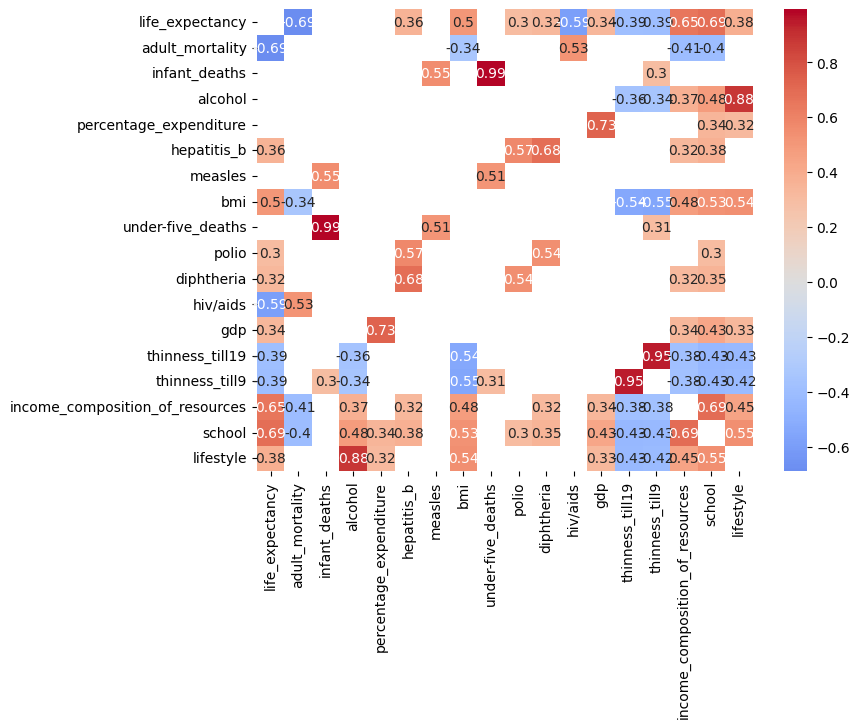

In [27]:
def dsa_filtrar_e_visualizar_correlacao(df, threshold, drop_column = None):
    # Calcula a matriz de correlação
    corr = df.corr()
        # Aplica os filtros de limiar, excluindo a correlação perfeita
    filtro = (abs(corr) >= threshold) & (corr != 1.0)
    df_filtrado = corr.where(filtro).dropna(how = 'all').dropna(axis = 1, how = 'all')
    # Remove a coluna e linha especificada, se fornecido
    if drop_column:
        df_filtrado = df_filtrado.drop(index = drop_column, 
                                       errors = 'ignore').drop(columns = drop_column, 
                                                               errors = 'ignore')
    
    # Visualiza o resultado com um heatmap somente com as variáveis que satisfazem o critério de filtro
    plt.figure(figsize = (8, 6))
    sns.heatmap(df_filtrado, annot = True, cmap = 'coolwarm', center = 0)
    plt.show()


dsa_filtrar_e_visualizar_correlacao(novo_df, threshold = 0.3, drop_column = None)

As variáveis adult_mortality, alcohol, bmi, polio, diphtheria, hiv, gdp, thinness_till19, thinness_till9, school e lifestyle atendem ao nosso critério. São as variáveis preditoras com maior correlação com a variável alvo.

Agora devemos checar uma das suposições da Regressão Linear e identificar possíveis problemas de multicolinearidade (alta correlação entre as variáveis preditoras). Com base nesse critério eliminamos uma de duas variáveis preditoras altamente correlacionadas. Vamos considerar 0.65 como marca de corte. Vamos filtrar mais uma vez a matriz de correlação.

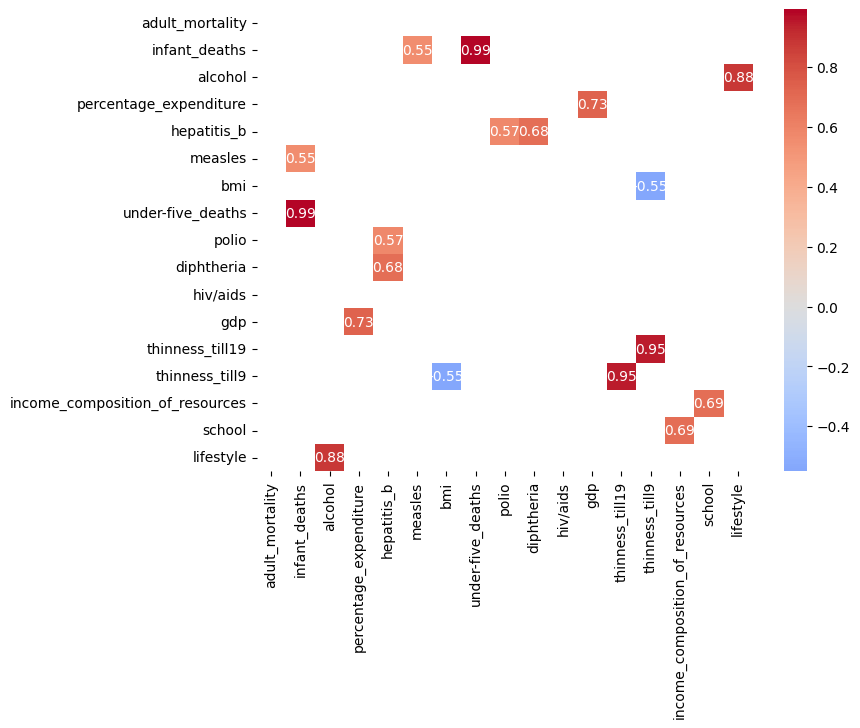

In [28]:
dsa_filtrar_e_visualizar_correlacao(novo_df, threshold = 0.55, drop_column = 'life_expectancy')

### Decisão

**Primeiro Filtro - Correlação com a Variável Alvo**

As variáveis adult_mortality, alcohol, bmi, polio, diphtheria, hiv, gdp, thinness_till19, thinness_till9, school e lifestyle atendem ao nosso primeiro critério. São as variáveis preditoras com maior correlação com a variável alvo.

**Segundo Filtro - Multicolinearidade**

Com base no filtro de multicolinearidade, as variáveis adult_mortality, diphtheria, hiv, gdp, thinness_till19, school e lifestyle serão as variáveis mantidas para a modelagem estatística.

Nota: Manter a variável bmi ao invés da variável lifestyle também é uma decisão válida! 

In [34]:
novo_df.columns

Index(['year', 'life_expectancy', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness_till19', 'thinness_till9',
       'income_composition_of_resources', 'school', 'lifestyle'],
      dtype='object')

In [35]:
novo_df_final = novo_df[["life_expectancy", "adult_mortality", "diphtheria", "hiv/aids", "gdp", "thinness_till9", "school", "lifestyle"]]
novo_df_final.head()

,life_expectancy,adult_mortality,diphtheria,hiv/aids,gdp,thinness_till9,school,lifestyle
1,59.9,271.0,62.0,0.1,612.696514,17.5,10.0,0.186
3,59.5,272.0,67.0,0.1,669.959000,18.0,9.8,0.176
4,59.2,275.0,68.0,0.1,63.537231,18.2,9.5,0.172
5,58.8,279.0,66.0,0.1,553.328940,18.4,9.2,0.167
6,58.6,281.0,63.0,0.1,445.893298,18.7,8.9,0.162
